## الف)

$$
\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} -400x_1(x_2 - x_1^2) - 2(1 - x_1) \\ 200(x_2 - x_1^2) \end{bmatrix}
$$

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
= \begin{bmatrix}
-400(x_2 - x_1^2) + 800x_1^2 + 2 & -400x_1 \\
-400x_1 & 200
\end{bmatrix}
$$

In [1]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

f = 100*(x2 - x1**2)**2 + (1 - x1)**2

grad_f = [sp.diff(f, x1), sp.diff(f, x2)]

hessian_f = [[sp.diff(grad_f[0], x1), sp.diff(grad_f[0], x2)],
             [sp.diff(grad_f[1], x1), sp.diff(grad_f[1], x2)]]

print("∇f =")
sp.pprint(grad_f)

print("Hf =")
sp.pprint(hessian_f)


∇f =
⎡         ⎛    2     ⎞                     2         ⎤
⎣- 400⋅x₁⋅⎝- x₁  + x₂⎠ + 2⋅x₁ - 2, - 200⋅x₁  + 200⋅x₂⎦
Hf =
⎡⎡       2                      ⎤                ⎤
⎣⎣1200⋅x₁  - 400⋅x₂ + 2, -400⋅x₁⎦, [-400⋅x₁, 200]⎦


In [2]:
import numpy as np

def f(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f(x):
    x1, x2 = x
    grad_x1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    grad_x2 = 200 * (x2 - x1**2)
    return np.array([grad_x1, grad_x2])

def hessian_f(x):
    x1, x2 = x
    h11 = -400 * (x2 - x1**2) + 800 * x1**2 + 2
    h12 = -400 * x1
    h21 = -400 * x1
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

## ب)

In [3]:
x0 = np.array([-4.0, 10.0])

### Steepest-Decent

$$
x^{k+1} = x^{k} - \alpha_k \nabla f(x^{k})
$$

$$
\alpha_k = \frac{\nabla f(x_k)^T \nabla f(x_k)}{\nabla f(x_k)^T Hf(x_k) \nabla f(x_k)}
$$

In [4]:
x = x0
for i in range(40000):
    grad = grad_f(x)
    hess = hessian_f(x)
    alpha = np.dot(grad, grad) / np.dot(grad, np.dot(hess, grad))  # Line search
    x = x - alpha * grad

print(f"Steepest Descent:\n x* = {x}, f(x*) = {f(x)}, Iterations = {i+1}")

Steepest Descent:
 x* = [1. 1.], f(x*) = 2.961309882489814e-28, Iterations = 40000


### Newton

$$
x^{k+1} = x^{k} - H_f^{-1}(x^{k}) \nabla f(x^{k})
$$

In [5]:
x = x0
for i in range(6):
    grad = grad_f(x)
    hess = hessian_f(x)
    hess_inv = np.linalg.inv(hess)
    x = x - np.dot(hess_inv, grad)

print(f"Newton Method:\n x* = {x}, f(x*) = {f(x)}, Iterations = {i+1}")

Newton Method:
 x* = [1. 1.], f(x*) = 0.0, Iterations = 6


## ج)

In [6]:
x = x0
for i in range(10000):
    grad = grad_f(x)
    hess = hessian_f(x)
    alpha = np.dot(grad, grad) / np.dot(grad, np.dot(hess, grad))  # Line search
    x = x - alpha * grad

for i in range(3):
    grad = grad_f(x)
    hess = hessian_f(x)
    hess_inv = np.linalg.inv(hess)
    x = x - np.dot(hess_inv, grad)

print(f"Combinational Method:\n x* = {x}, f(x*) = {f(x)}, Iterations = {i+1}")

Combinational Method:
 x* = [1. 1.], f(x*) = 0.0, Iterations = 3


## د)

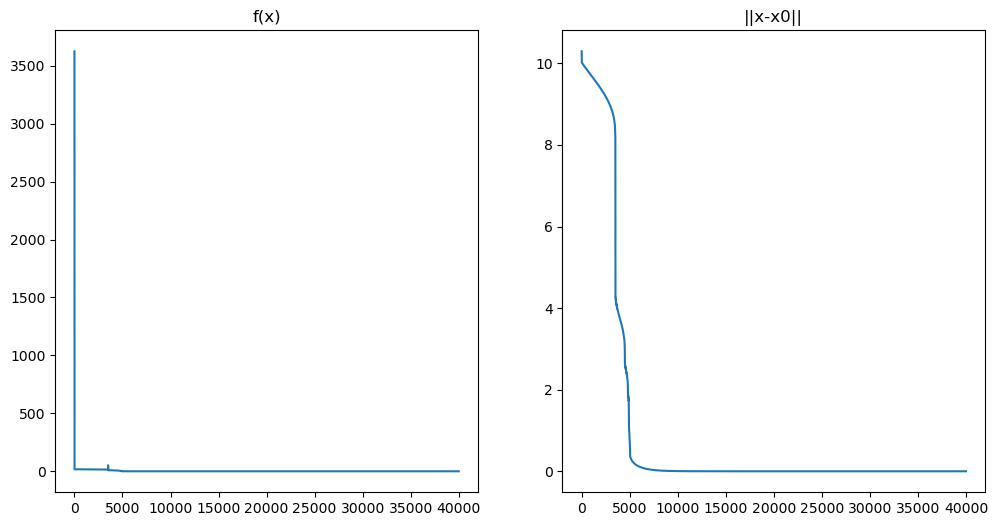

In [7]:
import matplotlib.pyplot as plt

x = x0
f_values = [f(x)]
distances = [np.linalg.norm(x - np.array([1, 1]))]
for i in range(40000):
    grad = grad_f(x)
    hess = hessian_f(x)
    alpha = np.dot(grad, grad) / np.dot(grad, np.dot(hess, grad))
    x = x - alpha * grad
    f_values.append(f(x))
    distances.append(np.linalg.norm(x - np.array([1, 1])))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(f_values)
plt.title("f(x)")

plt.subplot(1, 2, 2)
plt.plot(distances)
plt.title("||x-x0||")

plt.show()

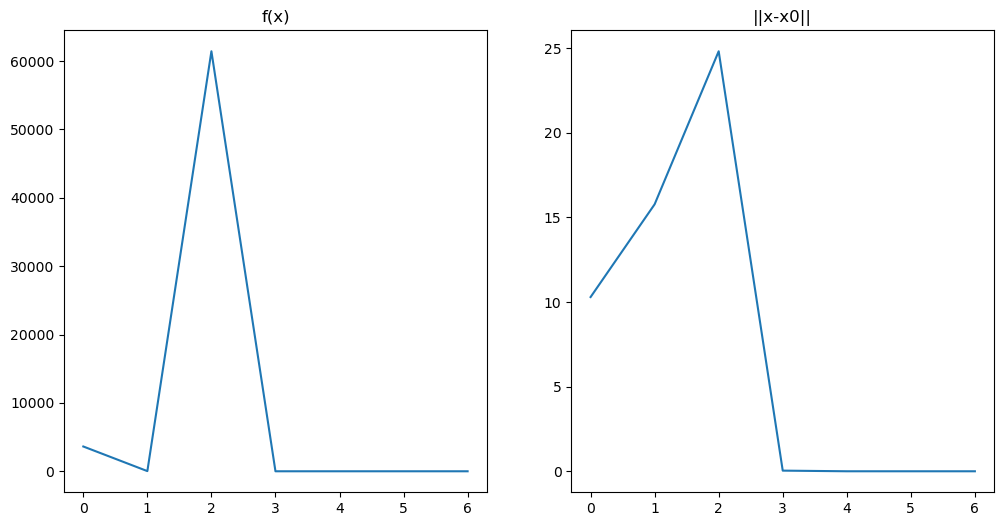

In [8]:
x = x0
f_values = [f(x)]
distances = [np.linalg.norm(x - np.array([1, 1]))]
for i in range(6):
    grad = grad_f(x)
    hess = hessian_f(x)
    hess_inv = np.linalg.inv(hess)
    x = x - np.dot(hess_inv, grad)
    f_values.append(f(x))
    distances.append(np.linalg.norm(x - np.array([1, 1])))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(f_values)
plt.title("f(x)")

plt.subplot(1, 2, 2)
plt.plot(distances)
plt.title("||x-x0||")

plt.show()